In [1]:
import os
import re

import numpy as np
import pandas as pd

from source.processes import Shuffler
from source.datamodels.datamodels import BootstrapDatasetsComparisonResults
from source.datamodels.datamodels import Axes, Stats

In [2]:
project_folder = "F:/PythonNotebooks/Study/Quantum/Bearings/"
own_data_path = os.path.join(project_folder, "data/own datasets/")
third_party_data_path = os.path.join(project_folder, "data/third party datasets/")

In [3]:
prepared_data_our = pd.read_csv(os.path.join(own_data_path, 'processed_full_signal_specter1000_noscale.csv'), delimiter=',')  # our experiment
prepared_data_cesar = pd.read_csv(os.path.join(third_party_data_path, 'N1 Cesar Ricardo', 'csv',
                                               'processed_full_signal_specter1000_noscale.csv'), delimiter=',')  # third-party dataset
prepared_data_cesar.head()

,target,group,a1_y_signal_activity,a1_y_signal_energy,a1_y_signal_iqr,a1_y_signal_variation,a1_y_signal_mean,a1_y_signal_range,a1_y_signal_std,a1_y_signal_complexity,...,a2_y_specter_complexity,a2_y_specter_skew,a2_y_specter_sample_entropy,a2_y_specter_kurtosis,a2_y_specter_hurst,a2_y_specter_petrosian_fd,a2_y_specter_zero_crossing,a2_y_specter_crest_factor,a2_y_specter_higuchi_fd,a2_y_specter_shannon_entropy
0,1.0,1.0,0.041605,44338.707155,0.026614,0.006545,1.922169,0.042966,0.012580,31.661320,...,3.417990,-0.112285,2.868557,-0.034169,0.788408,1.025012,0.0,1.000277,1.608481,9.965784
1,1.0,1.0,0.133815,44540.227042,0.001980,0.002293,1.926568,0.037050,0.004417,10.516747,...,5.375270,-0.797098,2.805931,0.636421,0.657959,1.025371,0.0,1.305359,1.601905,9.965784
2,1.0,1.0,0.470884,44653.643007,0.001556,0.000625,1.929024,0.020445,0.001207,2.934539,...,4.808027,0.067012,2.863283,-0.084551,0.677378,1.024806,0.0,1.175973,1.593797,9.965784
3,1.0,1.0,0.870449,44680.818980,0.001434,0.000777,1.929611,0.061155,0.001498,1.831956,...,4.470592,-0.215543,2.867958,-0.321073,0.713769,1.026344,0.0,1.266530,1.613716,9.965784
4,1.0,1.0,0.460420,44708.987425,0.001382,0.000564,1.930220,0.012463,0.001088,2.952793,...,3.973786,0.454384,2.867852,0.251929,0.749379,1.024600,0.0,1.364315,1.535780,9.965784


In [4]:
our_dataset_cols_to_delete_prefixes = ['a1_x', 'a1_z', 'a2_x', 'a2_z']
our_dataset_cols = prepared_data_our.columns
cols_to_leave = [col for col in our_dataset_cols if not re.search(pattern='^a[12]_[xz]', string=col)]
prepared_data_our = prepared_data_our[cols_to_leave]
prepared_data_our.head()

,target,group,a1_y_signal_complexity,a1_y_signal_shannon_entropy,a1_y_signal_kurtosis,a1_y_signal_variation,a1_y_signal_hurst,a1_y_signal_skew,a1_y_signal_activity,a1_y_signal_iqr,...,a2_y_specter_iqr,a2_y_specter_zero_crossing,a2_y_specter_range,a2_y_specter_mean,a2_y_specter_petrosian_fd,a2_y_specter_higuchi_fd,a2_y_specter_crest_factor,a2_y_specter_energy,a2_y_specter_std,a2_y_specter_sample_entropy
0,0.0,1.0,3.100466,5.628094,0.389080,-93.999116,0.206889,0.365208,0.437712,1.608786,...,127.083937,0.0,324.665941,144.089754,1.024343,1.420136,1.985256,2.688847e+07,78.272678,2.914185
1,0.0,1.0,2.866693,5.571487,-0.164861,3504.572754,0.265750,0.043096,0.478841,1.608786,...,81.869311,0.0,305.108538,167.014306,1.023878,1.447423,1.800562,3.115210e+07,57.081674,2.895828
2,0.0,1.0,2.939681,5.677412,-0.257201,-63.715093,0.242578,0.053761,0.462579,1.703421,...,69.246355,0.0,275.158344,118.247879,1.025577,1.500578,2.209490,1.679282e+07,53.011865,2.867007
3,0.0,1.0,3.121533,5.593416,-0.178955,-87.235829,0.247701,0.245106,0.444901,1.703421,...,71.957257,0.0,258.635687,100.722478,1.024085,1.522405,2.329906,1.273816e+07,50.922880,2.847588
4,0.0,1.0,2.935835,5.668443,-0.427914,586.585196,0.235952,0.045068,0.468474,1.798055,...,86.943406,0.0,315.980245,145.169932,1.022998,1.436566,2.025598,2.487754e+07,61.670318,2.913078


In [5]:
our_groups_max = np.max(prepared_data_our['group'])
prepared_data_cesar['group'] = prepared_data_cesar['group'].apply(lambda x: x + our_groups_max)

In [6]:
prepared_data = pd.concat([prepared_data_our, prepared_data_cesar])
print(prepared_data['group'].unique())
prepared_data.info()

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 153. 154. 155.
 156. 157.]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 0 to 439
Data columns (total 70 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        -------

In [7]:
# models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [8]:
LR_estimator = LogisticRegression(max_iter=10000)
SVC_estimator = SVC()
RFC_estimator = RandomForestClassifier()
GBM_estimator = GradientBoostingClassifier()
KNN_estimator = KNeighborsClassifier()

In [9]:
LR_grid = {"C": np.logspace(-3, 6, 10)}
SVC_grid = {"C": np.logspace(-3, 6, 10), 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
RFC_grid = {'n_estimators': [20, 50, 100, 200, 500], 'max_depth': [1, 3, 5, 9, 15, 30, None]}
GBM_grid = {'learning_rate': np.logspace(-3, 4, 8), 'n_estimators': [50, 100, 200, 500], 'max_depth': [1, 3, 5, 9, 15, 30, None]}
KNN_grid = {'n_neighbors': [1, 3, 5, 7, 9, 15, 35], 'p': [1, 1.5, 2, 2.5, 6, 100]}

In [10]:
X = prepared_data.drop(columns=['target', 'group']).values
y = prepared_data['target'].values
groups = prepared_data['group'].values
our_groups = prepared_data_our['group'].values
cesar_groups = prepared_data_cesar['group'].values

X_scaled = StandardScaler().fit_transform(X)

In [13]:
from datetime import datetime

GS_results_objects = []
estimators = [LR_estimator, SVC_estimator]
grids = [LR_grid, SVC_grid]
names = ['LR', 'SVC']
score_name = 'f1'
n_repeats = 100

for estimator, grid, name in zip(estimators, grids, names):
    start_time = datetime.now()
    cv = Shuffler.PresplitedOverlapGroupCV(subset_size=0.63, n_repeats=n_repeats).split(X_scaled, y, groups=groups, train_groups=our_groups, test_groups=cesar_groups)
    GSCV = GridSearchCV(estimator, grid, scoring=score_name, cv=cv)
    GSCV.fit(X_scaled, y, groups=groups)

    print(f"Best {score_name} score for {name}: {100*GSCV.best_score_:.3f}% \n best params: {GSCV.best_params_}\n required time: {datetime.now() - start_time}\n")

    highest_score_params = GSCV.cv_results_['rank_test_score'][0]
    split_scores_names = [f'split{idx}_test_score' for idx in range(n_repeats)]

    scores_distr = []
    for split_scores_name in split_scores_names:
        scores_distr.append(GSCV.cv_results_[split_scores_name][highest_score_params-1])
    res = BootstrapDatasetsComparisonResults(
        run_label = "GS",
        model_name = name,
        hyperparameters = GSCV.best_params_,
        use_signal = True,
        use_specter = True,
        specter_threshold = 1000,
        axes = Axes.get_keys(),
        stats = Stats.get_keys(),
        scores = {score_name: GSCV.best_score_},
        predictions = [0.],
        resampling_number = n_repeats,
        bootstrap_scores =  {score_name: scores_distr},
        train_brg_id = list(our_groups),
        test_brg_id = list(cesar_groups),
        train_dataset_name = 'our',
        test_dataset_name = 'Cesar1',
        signal_scaler = "",
    )
    GS_results_objects.append(res)

Best f1 score for LR: 34.164% 
 best params: {'C': 1000.0}
 required time: 0:02:12.757674

Best f1 score for SVC: 35.748% 
 best params: {'C': 10000.0, 'kernel': 'sigmoid'}
 required time: 0:01:49.337458



In [14]:
estimators_score_distr = [res.bootstrap_scores for res in GS_results_objects]
estimators_scores_means = [res.scores for res in GS_results_objects]

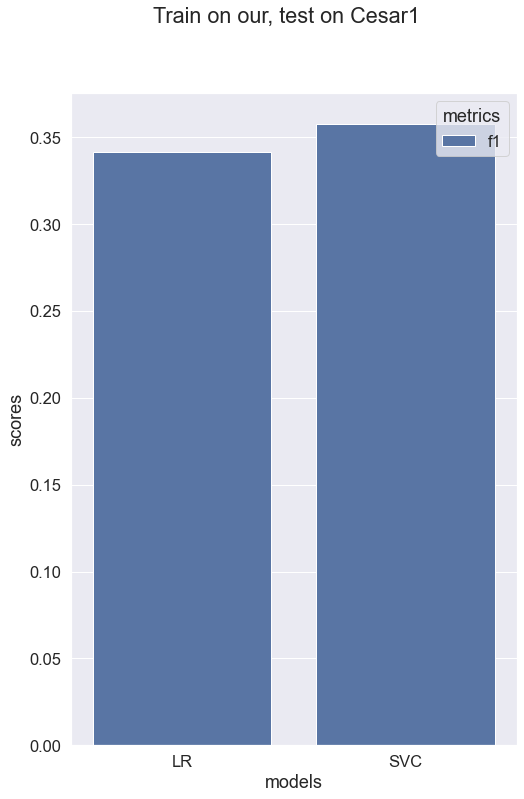

In [16]:
from source.postprocessing.plotter import dist_plot, bar_plot

# dist_plot(results=estimators_score_distr, models=names, metrics=['f1'], plot_size=(8, 12), Title='GridSearch', filename='GS_LR_SVC.png')
dist_plot(methods, ['RFC', 'GBM', 'LR', 'KNN'], 'kdeplot', 'f1', (15, 8), 'Title', 'test')
# bar_plot(results=estimators_scores_means, models=names, metrics=['f1'], plot_size=(8, 12), Title='Train on our, test on Cesar1', filename='Our_Cesar1.png')